<a href="https://colab.research.google.com/github/priya-08B/Brainwave-Matrix-Intern-/blob/main/twitter_sentiments_using(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Twitter Sentiments.csv')
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      21602 non-null  int64 
 1   label   21602 non-null  int64 
 2   tweet   21602 non-null  object
dtypes: int64(2), object(1)
memory usage: 506.4+ KB


In [ ]:
df.shape

(21602, 3)

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.tail()

,id,label,tweet
21597,21598,0,i'm so today my small #cousin got his first ...
21598,21599,0,"for #rohingya, fear and forced marriages #traf..."
21599,21600,0,birds &amp; bad #piggies #finger family \ #n...
21600,21601,0,"now that #bfestbuzz is winding down, get for..."
21601,21602,0,no history of an incid


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
21597,21598,0,i'm so today my small #cousin got his first ...
21598,21599,0,"for #rohingya, fear and forced marriages #traf..."
21599,21600,0,birds &amp; bad #piggies #finger family \ #n...
21600,21601,0,"now that #bfestbuzz is winding down, get for..."


In [ ]:
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [ ]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-z A-Z#]", " ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : " ".join([w for w in x.split() if (len(w)>2)]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish drags hi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit can't use cause they d...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time urð±!!! ð...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : " ".join([w for w in x.split() if (len(w)>2)]))
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional and selfish drags hi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit can't use cause they d...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time urð±!!! ð...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
tokenized_tweet = df['clean_tweet'].apply(lambda x : x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, and, selfish, dr...
1    [thanks, for, #lyft, credit, can't, use, cause...
2                              [bihday, your, majesty]
3    [#model, love, take, with, all, the, time, urð...
4             [factsguide:, society, now, #motivation]
Name: clean_tweet, dtype: object

In [ ]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, and, selfish, drag, h...
1    [thank, for, #lyft, credit, can't, use, caus, ...
2                              [bihday, your, majesti]
3    [#model, love, take, with, all, the, time, urð...
4                  [factsguide:, societi, now, #motiv]
Name: clean_tweet, dtype: object

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])

df['clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct and selfish drag hi kid i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit can't use caus they don...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with all the time urð±!!! ð...
4,5,0,factsguide: society now #motivation,factsguide: societi now #motiv


In [ ]:
def hashtag_extract(tweet):
    hashtags = []
    # Loop words in the tweet
    for tweets in tweet:
        ht = re.findall(r"#(\w+)", tweets)
        hashtags.append(ht)
    return hashtags

In [ ]:
ht_positive = hashtag_extract(df['clean_tweet'][df['label'] == 0])
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr8'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['80day', 'gettingf'],
 ['got7', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro2016'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica16'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift1989'],
 ['tra

In [ ]:
ht_negative= hashtag_extract(df['clean_tweet'][df['label'] == 1])
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'medâ'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golfâ'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 ['â'],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflictâ'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 ['2016'],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['p2', 'p21', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'officerâ'],
 [],
 ['black', 'retweet', 'tampa', 'miamiâ'],
 ['allahsoil'],
 [],
 ['prais', 'clevelan

In [ ]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [ ]:
ht_negative[:5]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia']]

In [ ]:
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [ ]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [ ]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [ ]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count' : list(freq.values())})
d.head()

,Hashtag,Count
0,run,47
1,lyft,1
2,disapoint,1
3,getthank,2
4,model,255


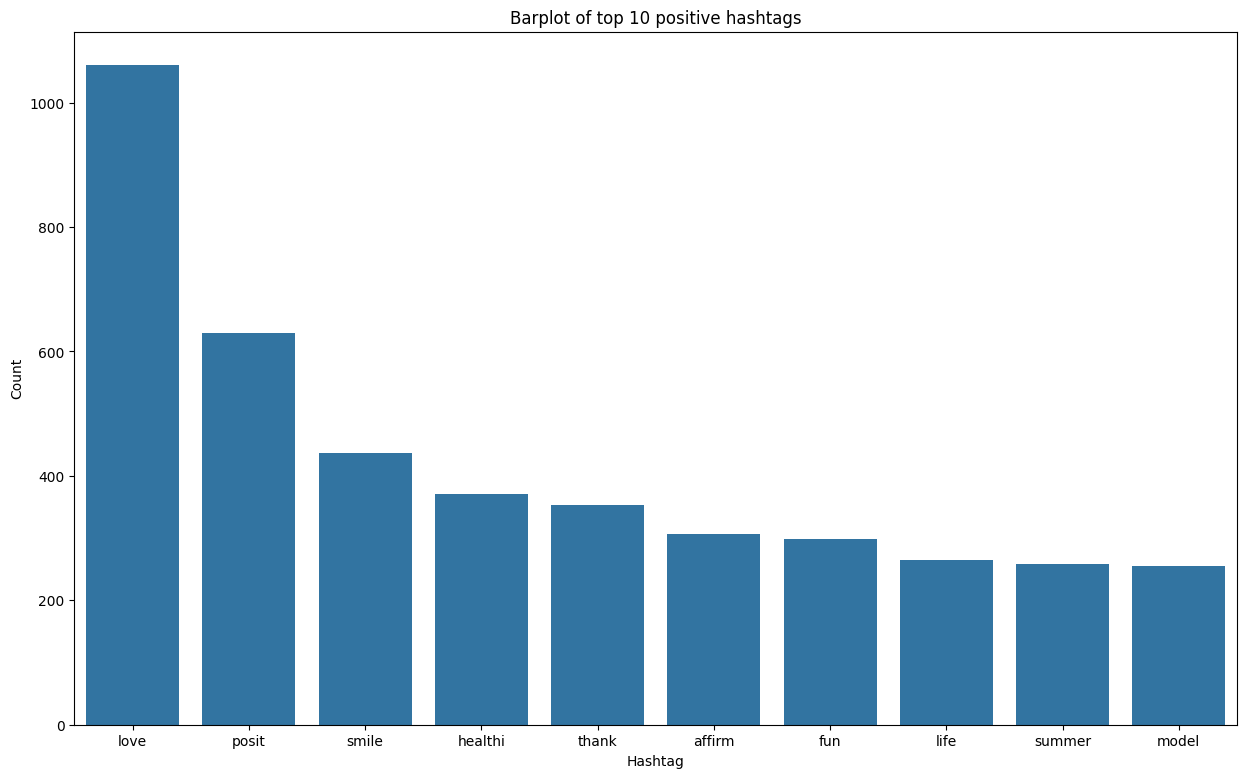

In [ ]:
d = d.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15, 9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.title("Barplot of top 10 positive hashtags")
plt.show()

In [ ]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count' : list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,7
1,michigan,2
2,tcot,8
3,australia,4
4,opkillingbay,1


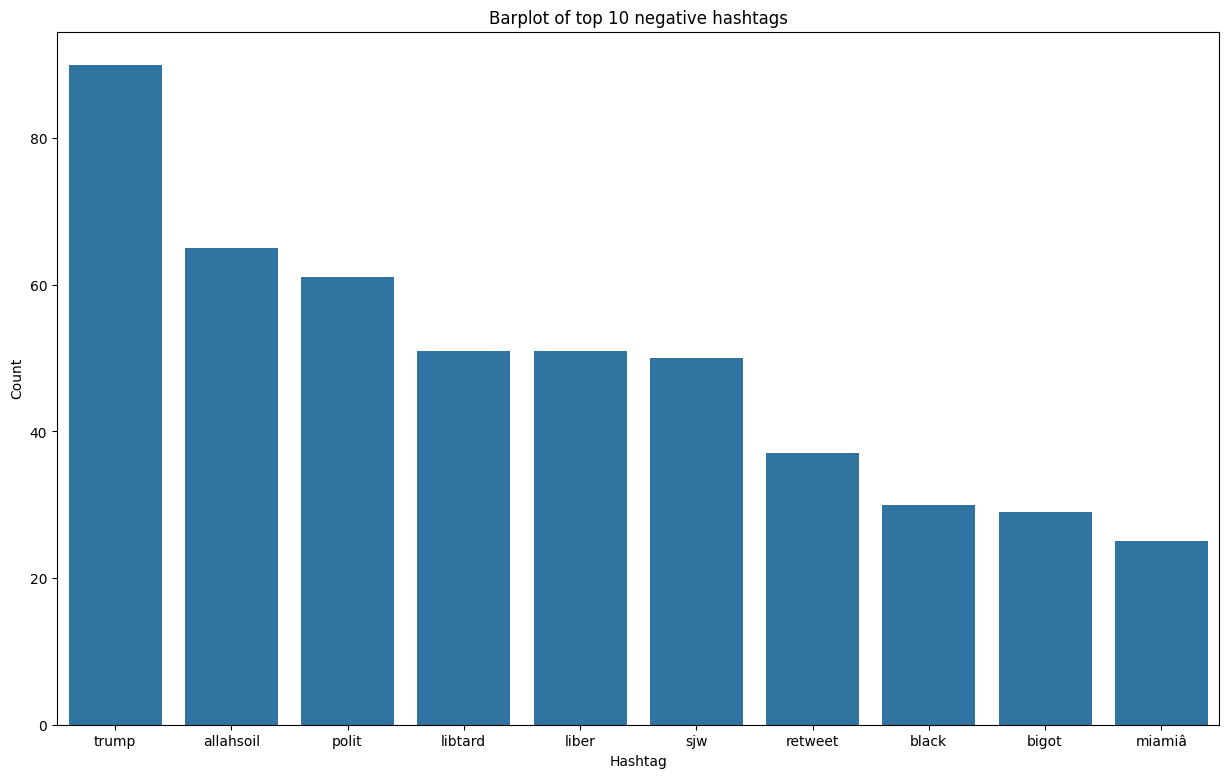

In [ ]:
d = d.nlargest(columns = 'Count', n = 10)
plt.figure(figsize = (15, 9))
sns.barplot(data = d, x = 'Hashtag', y = 'Count')
plt.title("Barplot of top 10 negative hashtags")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = 'english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])

In [ ]:
bow

<21602x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 91477 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, df['label'], random_state = 43, test_size = 0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
model = LogisticRegression()
model

LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred = model.predict(X_test)
f1_score(y_test, pred)

0.46863468634686345

In [ ]:
accuracy_score(y_test, pred)

0.9466765413812257

In [ ]:
pred_prob = model.predict_proba(X_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(int)

f1_score(y_test, pred)

0.5511111111111111

In [ ]:
accuracy_score(y_test, pred)

0.9438992779114979

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
score = accuracy_score(y_test, pred)
print("\nAccuracy score :", score*100)
report = classification_report(y_test, pred)
print("\nClassification Report :\n", report)


Accuracy score : 94.38992779114979

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      5027
           1       0.62      0.50      0.55       374

    accuracy                           0.94      5401
   macro avg       0.79      0.74      0.76      5401
weighted avg       0.94      0.94      0.94      5401



In [ ]:
df['label'].value_counts(normalize=True)

label
0    0.930886
1    0.069114
Name: proportion, dtype: float64

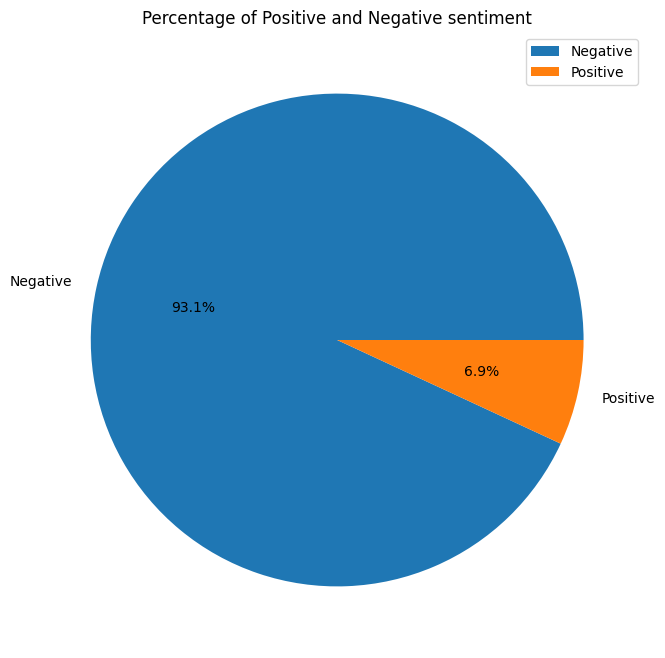

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(df['label'].value_counts(),labels=['Negative','Positive'],autopct='%1.1f%%')
plt.title("Percentage of Positive and Negative sentiment")
plt.legend()
plt.show()